In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

In [35]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score

In [3]:
imdb_df = pd.read_csv('data/final_imdb.csv')

In [4]:
imdb_df.columns

Index(['actors', 'director', 'duration', 'genre', 'imdb_rating', 'link',
       'synopsis', 'title', 'votes', 'page_url', 'page_url_cleaned',
       'release_start', 'action', 'adult', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music',
       'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi',
       'short', 'sport', 'talk-show', 'thriller', 'unknown', 'war', 'western',
       'tv_series'],
      dtype='object')

In [5]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89674 entries, 0 to 89673
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   actors            89674 non-null  object 
 1   director          89359 non-null  object 
 2   duration          81430 non-null  float64
 3   genre             88365 non-null  object 
 4   imdb_rating       89674 non-null  float64
 5   link              89674 non-null  object 
 6   synopsis          89672 non-null  object 
 7   title             89673 non-null  object 
 8   votes             89674 non-null  float64
 9   page_url          89674 non-null  object 
 10  page_url_cleaned  89674 non-null  object 
 11  release_start     89674 non-null  float64
 12  action            89674 non-null  int64  
 13  adult             89674 non-null  int64  
 14  adventure         89674 non-null  int64  
 15  animation         89674 non-null  int64  
 16  biography         89674 non-null  int64 

In [6]:
imdb_df.columns

Index(['actors', 'director', 'duration', 'genre', 'imdb_rating', 'link',
       'synopsis', 'title', 'votes', 'page_url', 'page_url_cleaned',
       'release_start', 'action', 'adult', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music',
       'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi',
       'short', 'sport', 'talk-show', 'thriller', 'unknown', 'war', 'western',
       'tv_series'],
      dtype='object')

In [7]:
model_df = imdb_df[[
    'imdb_rating', 'duration',  'votes',
    'release_start', 'action', 'adult', 'adventure', 'animation',
    'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
    'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music',
    'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi',
    'short', 'sport', 'talk-show', 'thriller', 'unknown', 'war', 'western',
    'tv_series'
]].dropna()

In [8]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81430 entries, 0 to 89673
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_rating    81430 non-null  float64
 1   duration       81430 non-null  float64
 2   votes          81430 non-null  float64
 3   release_start  81430 non-null  float64
 4   action         81430 non-null  int64  
 5   adult          81430 non-null  int64  
 6   adventure      81430 non-null  int64  
 7   animation      81430 non-null  int64  
 8   biography      81430 non-null  int64  
 9   comedy         81430 non-null  int64  
 10  crime          81430 non-null  int64  
 11  documentary    81430 non-null  int64  
 12  drama          81430 non-null  int64  
 13  family         81430 non-null  int64  
 14  fantasy        81430 non-null  int64  
 15  film-noir      81430 non-null  int64  
 16  game-show      81430 non-null  int64  
 17  history        81430 non-null  int64  
 18  horror

In [9]:
# creating categories for imdb_rating
px.histogram(model_df, 'imdb_rating')

In [19]:
model_df['imdb_rating_cat'] = pd.cut(model_df['imdb_rating'], bins=[0,4,6,8,10], right=True, labels=False) #pd.qcut(model_df['imdb_rating'], 2)
model_df['imdb_rating_num'] = model_df['imdb_rating']



In [20]:
px.histogram(model_df, 'imdb_rating_num', color='imdb_rating_cat')

In [21]:
model_type = 'cat' #'cat'
dep_var = f'imdb_rating_{model_type}'
indep_vars = model_df.columns.drop(['imdb_rating', 'imdb_rating_cat', 'imdb_rating_num'])

In [22]:
X = model_df[indep_vars]
X = MinMaxScaler().fit_transform(X)
y = model_df[dep_var]

if model_type == 'cat':
    y = LabelEncoder().fit_transform(y)

In [23]:
X.shape, y.shape

((81430, 33), (81430,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
model.score(X_test, y_test)#, roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.588419501412256

In [27]:
model = MultinomialNB().fit(X_train, y_train)
model.score(X_test, y_test)#, roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.5717794424659216

In [28]:
model = RandomForestClassifier().fit(X_train, y_train)
model.score(X_test, y_test)#, roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.6265504113962913

In [29]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model.score(X_test, y_test)#, roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.5286135330959106

In [30]:
model = XGBClassifier(n_estimators=250).fit(X_train, y_train)
model.score(X_test, y_test)#, roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.6415940071226821

In [33]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 199,  580,  202,    3],
       [ 161, 2899, 2356,   19],
       [  32, 1485, 7195,  131],
       [   5,   69,  794,  156]], dtype=int64)

In [34]:
# model = SVC().fit(X_train, y_train)
# model.score(X_test, y_test)

0.5937615129559131

In [37]:
model = KNeighborsClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.5691391379098613

In [47]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.1507677655821142

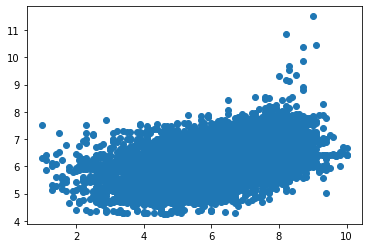

In [53]:
plt.scatter(y_test, y_pred)

In [50]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.45275775],
       [0.45275775, 1.        ]])

In [55]:
model = Ridge().fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.1507678911857184

# Unsupervised Sentiment Analysis

# Recommender system